# An Analysis of the *palmerpenguins* Dataset

<!-- Use left, center or right. Font size doesn't seem to change.-->
<p>
<div style="text-align: center;">
    <img src="img/palmerpenguins.png" width="10%">
</div>
<div style="text-align: center" font = 7> Artwork by @allison_horst </div>  
</p>  

****

| Topic | Details |
|---------|-------------|
| **Module:**  | 8634 - Principles of Data Analytics  |
| **Lecturer:**  | Ian McLoughlin  | 
| **Course:**  | Higher Diploma in Science in Computing (Data Analytics)  |
| **Year/Semester:**  | Year 1 / Semester 1  |
| **Author:**  | David O'Connell  |
| **Student ID:**  | G00438912  |
| **Student Email:**  | G00438912@atu.ie  |  
   
****

## Contents

[Overview](#Overview)  
[Packages Used](#Packages-Used)  
[Load the Data](#Load-the-Data)  
[Inspect the Data](#Inspect-the-Data)  
[Analyze the Data](#Analyze-the-Data)  
[Summary and Conclusions](#Summary-and-Conclusions)  
[References](#References)

**Note on links**  
Please use the Table of Contents autogenerated by GitHub

## Overview
<a class="acnchor" id="Overview"></a>
This notebook contains my analysis of the well-known *palmerpenguins* dataset for the Principles of Data Analytics module assessment.  
The *palmerpenguins* dataset is available on [GitHub](https://allisonhorst.github.io/palmerpenguins/), where it is stated that "the goal of palmerpenguins is to provide a great dataset for data exploration & visualization as an alternative to iris" [g1].  
  
There are 3 different species of penguins in this dataset, samples were collected from 3 islands in the Palmer Archipelago in Antarctica. [g1]. The collection locations are included in the dataset itself.  
  
The species of penguin for which samples were collected are:   
  
<a name="Penguin-Species"></a>
<p>
<div style="text-align: center" font=10 weight=bold> Figure 1 - Palmer Penguins species </div> 
<div style="text-align: center;">
    <img src="img/penguins.png" width="67%">
</div>
<div style="text-align: center" font = 7> Artwork by @allison_horst </div> 
</p>
    
  
Samples for the palmerpenguins dataset were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).  
  
The repository and artwork were created by [Allison Horst](https://allisonhorst.com/). 

## Packages Used
<a name="Packages-Used"></a>
This project makes use of the following packages for analysis and visualization of the *palmerpenguins* dataset.
   
| Software | Version | Summary|
|---------|-------------|---------|
|[Python](https://www.python.org/) | 3.11.7 | Python is a programming language that lets you work more quickly and integrate your systems more effectively.  |
|[NumPy](https://numpy.org/) |1.26.4 | NumPy is an open source project that enables numerical computing with Python.  |
|[Pandas](https://pandas.pydata.org/) |2.1.4 | Pandas is a software library written for the Python programming language for data manipulation and analysis.  |
|[Matplotlib](https://matplotlib.org/) | 3.8.0 | Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. |  
|[Seaborn](https://seaborn.pydata.org/) | 0.13.2 | Seaborn is a Python data visualization library based on matplotlib. |  
|[VS Code](https://code.visualstudio.com/) | 1.88.0 | Visual Studio Code is a lightweight but powerful source code editor which runs on your desktop. |  
|[Jupyter](https://jupyter.org/)| v2024.3.1 | VS Code extension for Jupyter Notebook support, interactive programming and computing that supports Intellisense, debugging and more. |  

Extensive use has been made of the DataFrame data structure in Pandas. It provides functionality to read data from csv and other file types into the DataFrame structure, which is similar to an excel sheet, and perform operations on the rows, columns and individual entries in that DataFrame.

In [291]:
# Import the packages required. Define aliases for brevity.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the Data
<a name="Load-the-Data"></a>
The *palmerpenguins* dataset is loaded from the link below. This version has undergone some reshaping to render it more suitable for use with Python (for example, 'NA's have been removed), as the csv available from the [*palmerpenguins* GitHub repository](https://allisonhorst.github.io/palmerpenguins/) was originally targeted for use with the R programming language. There is also a raw csv file in the *palmerpenguins* repository, however that file contains a number of extra columns (17 in total) which we do not need for the purposes of this exercise.

In [240]:
# Load the penguins dataset.
# PANDAS will load the file into memory and parse it - deals with headers, commas, newlines, etc.
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Inspect the Data  
<a name="Inspect-the-Data"></a>  
The data is now loaded into a Pandas dataframe and we can proceed to inspect it.  
Dataframes are a fundamental data structure in Pandas and are analagous to excel datasheets. Pandas provides native methods to query and manipulate dataframes.  
  
Firstly, confirm the size of the dataset - *pandas.Dataframe.shape* returns the number of rows and columns as a tuple.

In [241]:
# How many rows and columns.
penguins.shape

(344, 7)

Inspect the column headers and data types in the *penguins* dataset.

In [242]:
# List the column headers and the data type of each column.
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

There are 7 columns or attributes in this dataset.

The numeric columns are stored as dtype *float64*, which is what we would expect.   
According to [Pandas documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), strings can be stored either as *object* or *StringDType*, where *object* is the default. It is recommended for performance reasons to explicitly use *StringDType* for strings, however, as our dataset is not very large, we will stick with the default *object* dtype.

We now use *pandas.Dataframe.head* and *pandas.Dataframe.tail* to inspect the first and last *n* rows of data respectively. If *n* is not provided, the default value is 5. One benefit of using *tail*, as well as *head*, is that it confirms that the full dataset has been read in. In this case, we can see that there are 344 rows and 7 columns, as expected. There are also a couple of rows with NaN showing up - we will need to deal with those further on.

In [243]:
# Retrieve the first 5 rows.
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


There are 7 columns or attributes in this dataset.

The numeric columns are stored as dtype *float64*, which is what we would expect from looking at the data in the first 5 rows above.  
The "species", "island" and "sex" columns look like strings, but are stored as objects - according to [Pandas documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes), strings can be stored either as *object* or *StringDType*, where *object* is the default. It is recommended for performance reasons to explicitly use *StringDType* for strings, however, as our dataset is not very large, we will remain with the default *object* dtype.

In [244]:
# Retrieve the last 5 rows.
penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


Pandas also provides *loc* and *iloc* methods to inspect specific rows by label or position respectively.   
These methods can also be used to pull columns out of the dataframe. We will make use of this capability later.  
  
For example, if we wish to look at rows 50 through 55....

In [245]:
penguins.loc[50:55]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,FEMALE
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,MALE
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,FEMALE
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE


We can use *pandas.DataFrame.isnull()* to check how many rows are missing values.

In [246]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

2 rows missing data for each measured attribute. This should not be statistically very significant.  
11 rows are missing the sex of the penguin, which may be more significant if attempting to separate out data by sex. As a next step, we will look at the number of penguins of each sex.

In [247]:
# Count the number of penguins of each sex.
penguins['sex'].value_counts(dropna=False)

sex
MALE      168
FEMALE    165
NaN        11
Name: count, dtype: int64

We will now create a bar chart for the number of penguins of each sex,  including the missing values as 'NONE' for completeness.  
Reference [c5] was useful for this.

Text(0, 0.5, 'Count')

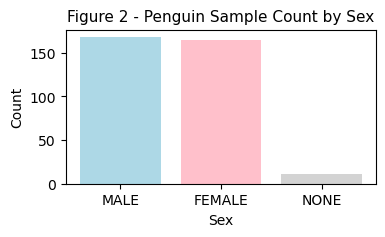

In [248]:
# Make a copy of the original dataframe as we do not want to overwrite the original data.
penguins2 = penguins.copy()
# Fill the missing values for sex with 'NONE'.
penguins2['sex'] = penguins2['sex'].fillna('NONE')
counts2 = penguins2['sex'].value_counts(dropna=False)
# Plot the number of each sex.
xb = ['MALE', 'FEMALE', 'NONE']
yb = [counts2['MALE'], counts2['FEMALE'], counts2['NONE']]
# Set the size, colours, labels and title of the plot.
fig=plt.figure(figsize=(4,2))
plt.bar(xb, yb, color=['lightblue','pink','lightgrey'])
plt.title("Figure 2 - Penguin Sample Count by Sex", fontsize=11)
plt.xlabel("Sex", fontsize=10)
plt.ylabel("Count", fontsize=10)

We will now create a histogram of one of the numeric attributes - body mass.

Text(0.5, 0.98, 'Figure 3 - Body Mass Distribution for each Penguin Species')

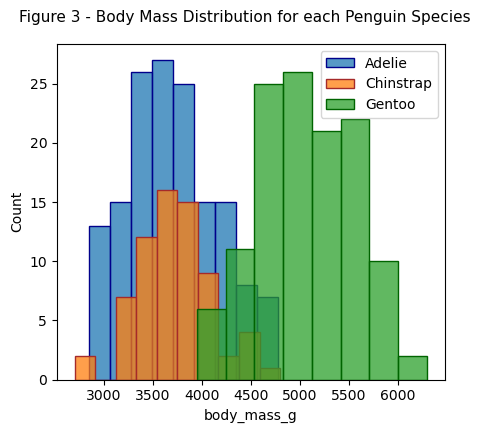

In [249]:
plot = sns.histplot(penguins[penguins['species']=="Adelie"]['body_mass_g'], edgecolor='darkblue')
plot = sns.histplot(penguins[penguins['species']=="Chinstrap"]['body_mass_g'], edgecolor='brown')
plot = sns.histplot(penguins[penguins['species']=="Gentoo"]['body_mass_g'],edgecolor='darkgreen')
plot.legend(["Adelie","Chinstrap","Gentoo"])
plot.figure.subplots_adjust(top = 0.9)
plot.figure.set_size_inches(5,4.25)
plot.figure.suptitle("Figure 3 - Body Mass Distribution for each Penguin Species", fontsize=11)

Next, we will count the number of penguins sampled from each species.

In [250]:
# Count the number of penguins of each species.
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

We will now plot the number of each species for which samples have been gathered, keeping the same colours as used for the background for each species in [Figure 1](#Penguin-Species) above. Reference [c4] was useful for this.

Text(0, 0.5, 'Species')

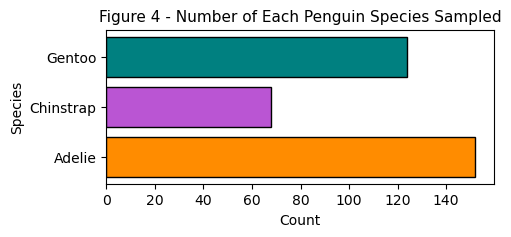

In [251]:
# Plot the count of each species
species_counts = penguins['species'].value_counts()
penguin_species=np.unique(penguins['species'])

# We will use this to set the colour
colourtest = [{'spec':'Adelie','col':'darkorange'},
              {'spec':'Chinstrap','col':'mediumorchid'},
              {'spec':'Gentoo','col':'teal'}]
index=0
# This list will hold the count of each penguin species
penguin_counts=[]
# This list will hold the bar colours
penguin_col=[]

# Build the list of counts
for p in penguin_species:
    penguin_counts.append(int(species_counts[p]))

    # Set the correct bar colours - I am sure there is a simpler way to do this
    col_index = 0
    for c in colourtest:
        if colourtest[col_index]['spec']==p:
            penguin_col.append(colourtest[col_index]['col'])
            break
        else:
            col_index+=1

    index+=1

# Draw the plot - used W3Schools and geeksforgeeks to get help with these
fig=plt.figure(figsize=(5,2))
plt.barh(penguin_species, penguin_counts, color=penguin_col, edgecolor='black')
plt.title("Figure 4 - Number of Each Penguin Species Sampled", fontsize=11)
plt.xlabel("Count", fontsize=10)
plt.ylabel("Species", fontsize=10)

We can see that the largest number of samples was taken for the Adelie species at 152; followed by Gentoo at 124. The smallest number of samples was taken for Chinstrap, at 68.

We will now look at the locations at which those samples were taken for each species.

In [252]:
# Show the distribution by island
location = pd.DataFrame(penguins.groupby(["island","species"])["island"].count())
location.rename(columns={"island":"sum"})
location
#print(location['island'])

island
island    species          
Biscoe    Adelie         44
          Gentoo        124
Dream     Adelie         56
          Chinstrap      68
Torgersen Adelie         52

We will  plot the sample location distributions per species for easier visualization.

Text(0.5, 0.98, 'Figure 5 - Sample Locations for each Penguin Species')

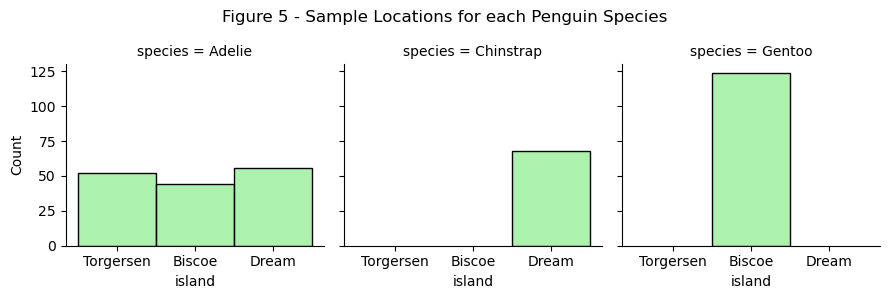

In [253]:
# Create a grid plot with the species as columns
x1 = sns.FacetGrid(penguins, col="species")
# Plot the locations that each species was sampled at
x1.map(sns.histplot, "island", color='lightgreen')
x1.figure.subplots_adjust(top = 0.8)
x1.figure.suptitle("Figure 5 - Sample Locations for each Penguin Species", fontsize=12)


We can see that only the Adelie species was sampled across more than one island; Gentoo and Chinstrap were each sampled on only 1 island. It may be possible that this gives rise to a greater spread in the data for Adelie. We will revisit this later on. 

## Analyze the Data
<a name="Analyze-the-Data"></a>

### Summary Statistics  
We can now look at the data in more depth, starting with a review of the summary statistics that Pandas generates.  

In [254]:
# Describe the data set. Takes the numerical variables.

penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Observations
These summary statistics are likely not very useful except at a very general level, as they hide the differences between species.
It is more beneficial to generate, review and compare the statistics for each species.

### Summary Statistics by Species   
We will now generate a smaller set of key statistics per species - minimum, maximum, mean values and standard deviation. 

In [255]:
# Slice the dataset into species
adelie = penguins[penguins['species']=="Adelie"]
chinstrap = penguins[penguins['species']=="Chinstrap"]
gentoo = penguins[penguins['species']=="Gentoo"]

print('Adelie', adelie.shape, ' | ', end=' ')       # Should be 152 rows x 7 columns
print('Chinstrap', chinstrap.shape, ' | ', end=' ') # Should be 68 rows x 7 columns
print('Gentoo', gentoo.shape)                       # Should be 124 rows x 7 columns

Adelie (152, 7)  |  Chinstrap (68, 7)  |  Gentoo (124, 7)


In [256]:
# Create a smaller set of key summary statistics per species
adelie_stats = adelie.agg({"bill_length_mm":["min", "max", "mean", "std"],"bill_depth_mm":["min", "max", "mean", "std"],
                           "flipper_length_mm":["min", "max", "mean", "std"],"body_mass_g":["min", "max", "mean", "std"]})
chinstrap_stats = chinstrap.agg({"bill_length_mm":["min", "max", "mean", "std"],"bill_depth_mm":["min", "max", "mean", "std"],
                                 "flipper_length_mm":["min", "max", "mean", "std"],"body_mass_g":["min", "max", "mean", "std"]})
gentoo_stats = gentoo.agg({"bill_length_mm":["min", "max", "mean", "std"],"bill_depth_mm":["min", "max", "mean", "std"],
                           "flipper_length_mm":["min", "max", "mean", "std"],"body_mass_g":["min", "max", "mean", "std"]})
print("Adelie\n", adelie_stats)
print("Chinstrap\n", chinstrap_stats)
print("Gentoo\n", gentoo_stats)


Adelie
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min        32.100000      15.500000         172.000000  2850.000000
max        46.000000      21.500000         210.000000  4775.000000
mean       38.791391      18.346358         189.953642  3700.662252
std         2.663405       1.216650           6.539457   458.566126
Chinstrap
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min        40.900000      16.400000         178.000000  2700.000000
max        58.000000      20.800000         212.000000  4800.000000
mean       48.833824      18.420588         195.823529  3733.088235
std         3.339256       1.135395           7.131894   384.335081
Gentoo
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min        40.900000      13.100000         203.000000  3950.000000
max        59.600000      17.300000         231.000000  6300.000000
mean       47.504878      14.982114         217.186992  5076.016260
std         3.081857 

At a glance we can see that Gentoo is the largest of the species with a mean weight of 5076g. Adelie and Chinstrap are on average a similar size, at 3700g and 3733g respectively. There is some overlap, with the minimum weight for Gentoo at 3950g below the maximum weight for Adelie and Chinstrap, at 4775g and 4800g respectively.  

Gentoo, however, has the smallest average bill depth and an average bill depth in between Adelie and Chinstrap - so it seems that these characteristics are not directly related to the size of the species.  

In the next sections, we will plot these attributes across the species - this should confirm these observations, and make others easier to spot.

### Attribute Plots

Plot the attributes, with each plot including a single attribute across all species. This will provide a view as to how those attributes overlap across the species. 

Text(0.5, 0.98, 'Figure 6 - Density Plots for the Numeric Attributes')

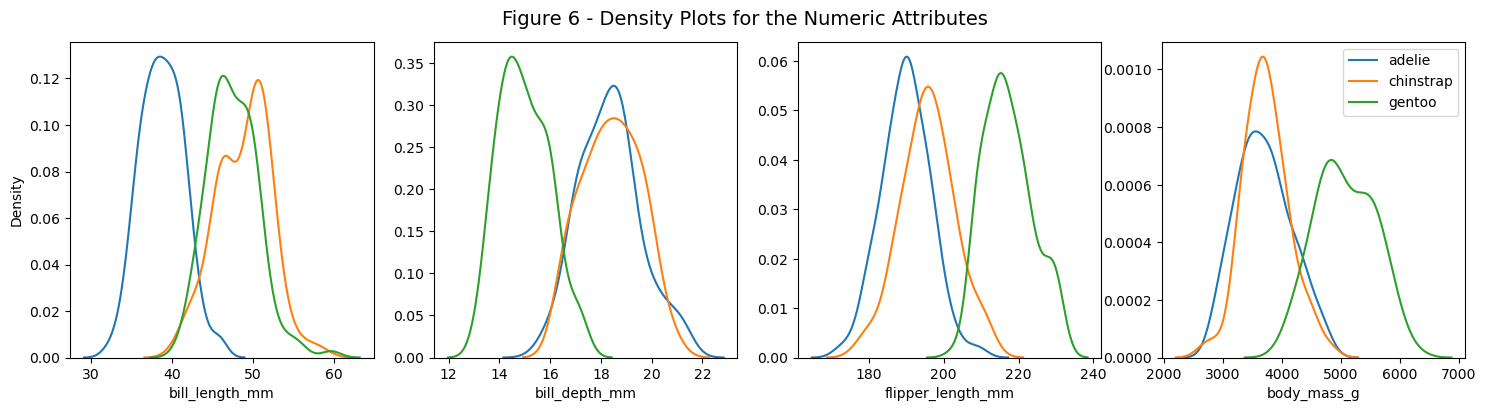

In [276]:
# Draw 4 sub-plots for the numeric attributes for each species.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,4))

# Bill length by species
sns.kdeplot(adelie['bill_length_mm'], ax=axes[0])
sns.kdeplot(chinstrap['bill_length_mm'], ax=axes[0])
sns.kdeplot(gentoo['bill_length_mm'], ax=axes[0])

# Bill depth by species
sns.kdeplot(adelie['bill_depth_mm'], ax=axes[1])
sns.kdeplot(chinstrap['bill_depth_mm'], ax=axes[1])
sns.kdeplot(gentoo['bill_depth_mm'], ax=axes[1])

# Flipper length by species
sns.kdeplot(adelie['flipper_length_mm'], ax=axes[2])
sns.kdeplot(chinstrap['flipper_length_mm'], ax=axes[2])
sns.kdeplot(gentoo['flipper_length_mm'], ax=axes[2])

# Body mass by species
sns.kdeplot(adelie['body_mass_g'], ax=axes[3])
sns.kdeplot(chinstrap['body_mass_g'], ax=axes[3])
sns.kdeplot(gentoo['body_mass_g'], ax=axes[3])
axes[3].legend(["adelie", "chinstrap", "gentoo"])
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')

fig.subplots_adjust(top = 0.9)
fig.suptitle("Figure 6 - Density Plots for the Numeric Attributes", fontsize=14)

#### Observations
For each attribute, one of the species stands out with less overlap, whereas the other 2 are almost completely overlapped; however it is not the same species each time. Neither are the results consistent - for example, we cannot say that one species is the 'biggest' - a species may be the largest on one or more attributes; however that same species may be the smallest on others.

### Scatter Plots
We will plot the attributes in pairs and look for patterns. To plot 4 attributes pairwise we need 4 x 3 plots. The order of comparison is not important (bill depth vs bill length is a mirror image of bill length vs bill depth), therefore we really only need (4 x 3) / 2 plots.
We could achieve this in Figures 7, 9 and 10 by setting "corner=True", however we will draw both sets to demonstrate that one is a mirror image of the other. 

Text(0.5, 0.98, 'Figure 7 - Scatterplots of Penguin Attribute Pairs, Colour Coded by Species')

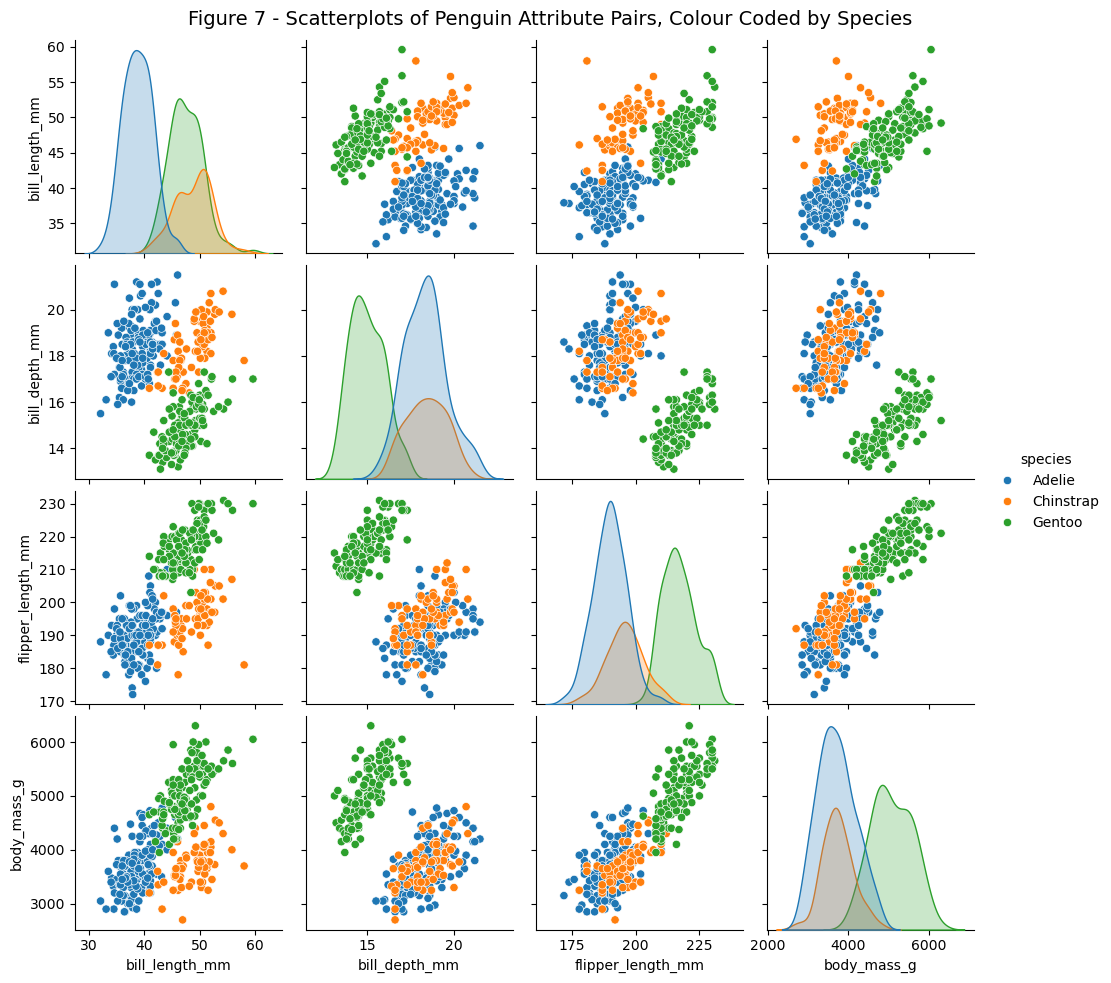

In [290]:
# Use Seaborn to draw the scatter plots
ax=sns.pairplot(penguins,hue="species", corner=False)
ax.figure.subplots_adjust(top = 0.95)
ax.figure.suptitle("Figure 7 - Scatterplots of Penguin Attribute Pairs, Colour Coded by Species", fontsize=14)

At first view, the Gentoo species is linearly separable in a number of cases; there is much more overlap between Adelie and Chinstrap.  

Aside from perhaps body mass vs. flipper length, none of the plots look particularly ilnear or highly correlated. We will calculate the correlations to get a quantitative view. 

### Correlation
Correlation is a measure of the degree of the relationship between two variables, and gives a view of how a change in one might be accompanied by a change in the other. The Pandas *corr()* method [c7] is used to establish a pairwise correlation between attributes (columns in the dataframe). NaN, NULL values are excluded. The method of calculation may be one of Pearson, Kendall-Tau and Spearman. Pearson is the default, and was used in this analysis [g5].

The Pearson correlation coefficient is defined as "the ratio between the covariance of two variables and the product of their standard deviations" [g3], where covariance in probability theory and statistics is a measure of the joint variability of two random variables, X and Y, and is defined as "the expected value (or mean) of the product of the deviations of X and Y from their individual expected values" [g4].
  
Pearson's correlation coefficient is a normalized measurement of the covariance, and the result is always between −1 and 1 [g3]. If both increase together, the covariance will be positive. If one decreases as the other increases, the covariance will be negative, denoting an inverse relationship.  
  
The lower the correlation value in absolute terms, the weaker the relationship between the x and y variables. For example, a correlation of 0.8 / -0.8 indicates a strong relationship between the variables; whereas a correlation of 0.2 / -0.2 implies a weak relationship.  
The Pearson correlation coefficient is symmetric: corr(X,Y) = corr(Y,X) [g3].

In [286]:
# Ignore any non-numeric columns. NaN values are automatically excluded. Ref [c1].
corr_penguins = penguins.corr(method='pearson', numeric_only=True)
corr_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [288]:
# Draw a correlation heatmap per species - annotate each cell with the correlation value
corr_adelie = adelie.corr(method='pearson', numeric_only=True)
corr_chinstrap = chinstrap.corr(method='pearson', numeric_only=True)
corr_gentoo = gentoo.corr(method='pearson', numeric_only=True)

Text(0.5, 0.98, 'Figure 8 - Pairwise Attribute Correlation Heatmaps, Overall and per Species')

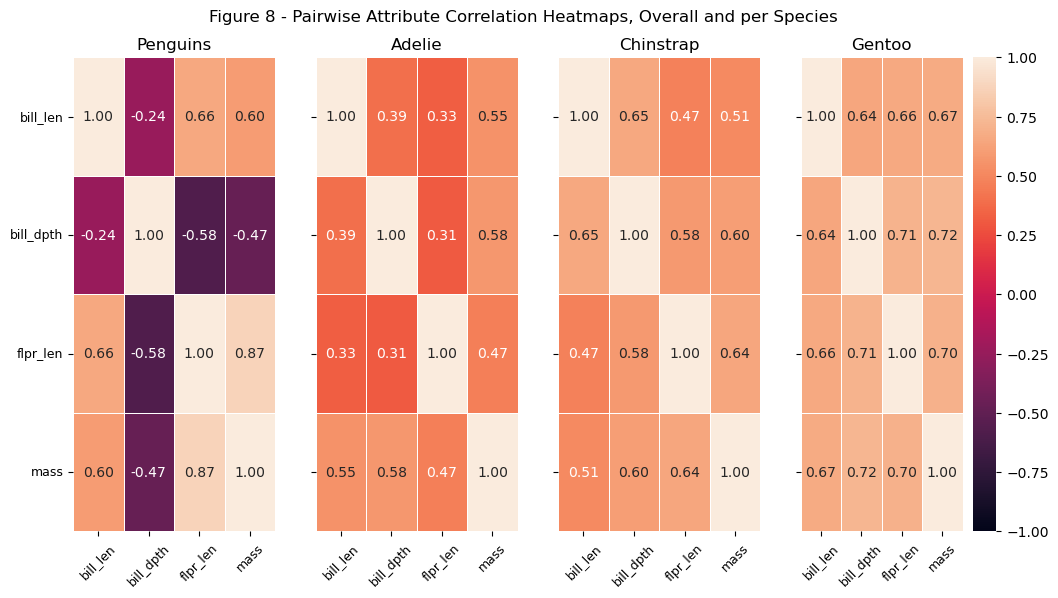

In [289]:
# Create the plot framework for the invididual heatmaps. The y-axis will be shared.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6), sharey='row')

# Draw 4 sub-plots for penguins overall, and for each species - set the titles accordingly.
# Set the same min and max so the colour bar will be common, and disable it on 3 plots.
# Reference [c2].

sns.heatmap(corr_penguins, annot=True, fmt=".2f", linewidth=.5, ax=axes[0], vmin=-1, vmax=1, cbar=False)
axes[0].set_title("Penguins")

sns.heatmap(corr_adelie, annot=True, fmt=".2f", linewidth=.5, ax=axes[1], vmin=-1, vmax=1, cbar=False)
axes[1].set_title("Adelie")

sns.heatmap(corr_chinstrap, annot=True, fmt=".2f", linewidth=.5, ax=axes[2], vmin=-1, vmax=1, cbar=False)
axes[2].set_title("Chinstrap")

sns.heatmap(corr_gentoo, annot=True, fmt=".2f", linewidth=.5, ax=axes[3], vmin=-1, vmax=1, cbar=True)
axes[3].set_title("Gentoo")

for i in range(4):
    axes[i].set_xticks([0.5,1.5,2.5,3.5], labels=['bill_len', 'bill_dpth', 'flpr_len', 'mass'])
    axes[i].xaxis.set_tick_params(rotation=45, labelsize=9)
    axes[i].set_yticks([0.5,1.5,2.5,3.5], labels=['bill_len', 'bill_dpth', 'flpr_len', 'mass'])
    axes[i].yaxis.set_tick_params(rotation=0, labelsize=9)

fig.subplots_adjust(top = 0.9)
fig.suptitle("Figure 8 - Pairwise Attribute Correlation Heatmaps, Overall and per Species", fontsize=12)
    

### Best Fit
A best fit or regression line is intended to represent a set of points such that the sum of the squared distance from each point to the line is minimized. This is called the Ordinary Least Squares (OLS) method [g5]. The distance (usually the vertical distance) from each point to the line is called the residual, and it may be positive or negative depending on whether the point is above of below the line.  
  
Linear regression is where the solution is a straight line or first order polynomial: $y = mx + c$, where $m$ is the *slope* and $c$ is the *intercept*.  
  
In this notebook, NumPy *polyfit()* and Seaborn *pairplot()* with its linear regression support are used.

Text(0.5, 0.98, 'Figure 9 - Best Fit Lines for Penguin Attribute Pairs, Colour Coded by Species')

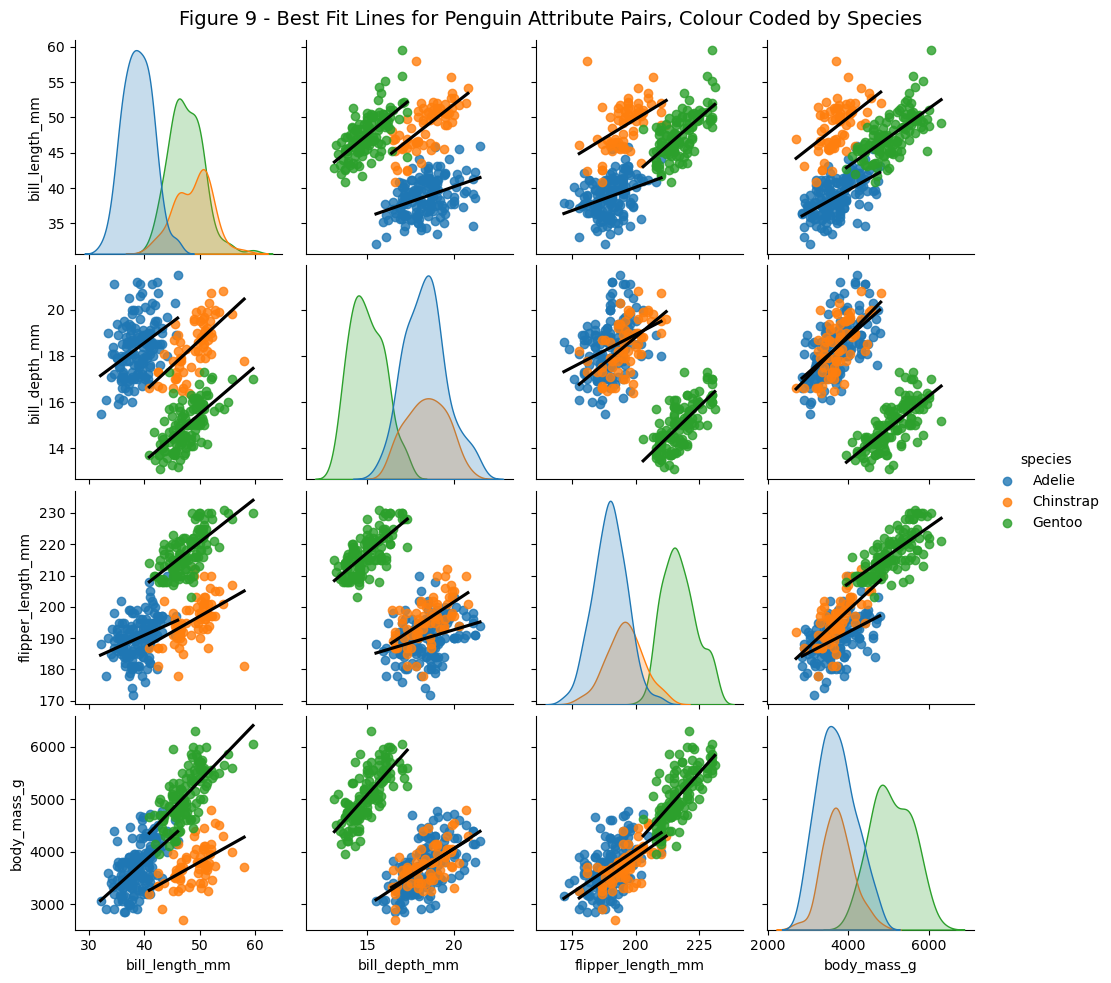

In [278]:
# Now add the best fit lines to the scatter plots we drew earlier.
bf = sns.pairplot(penguins, hue="species", kind='reg', corner=False, plot_kws={'line_kws':{'color':'black'},'ci':None})
bf.figure.subplots_adjust(top = 0.95)
bf.figure.suptitle("Figure 9 - Best Fit Lines for Penguin Attribute Pairs, Colour Coded by Species", fontsize=14)

However, the best fit lines plotted across all species paint a very different picture. The slope on 3 out of 6 of the best fit lines is negative, implying that the attribute plotted on the x-axis decreases as the attribute plotted on the x-axis increases. This is not the case for the best fit lines drawn for each species. 

Text(0.5, 0.98, 'Figure 10 - Best Fit Lines for Penguin Attribute Pairs')

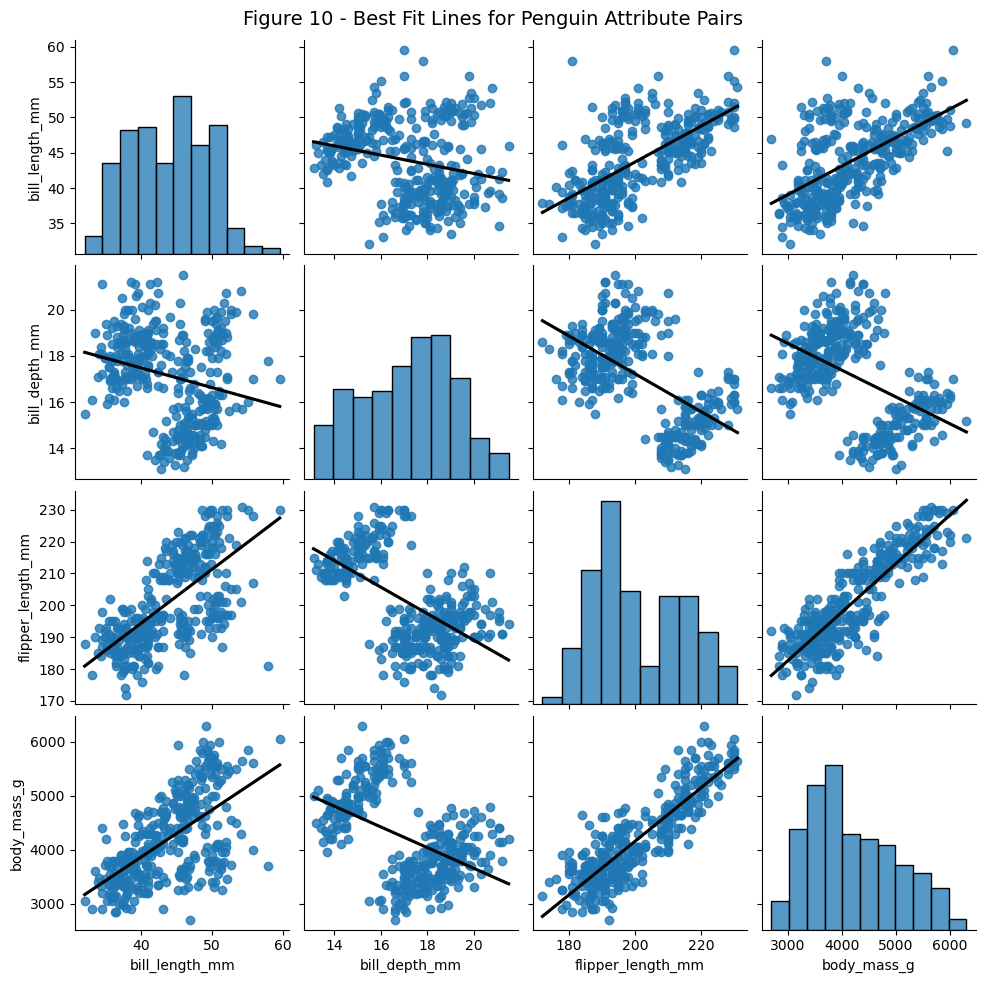

In [279]:
# Now draw the best fit lines for the penguins dataset overall.
bfl = sns.pairplot(penguins, kind='reg', corner=False, plot_kws={'line_kws':{'color':'black'},'ci':None})
bfl.figure.subplots_adjust(top = 0.95)
bfl.figure.suptitle("Figure 10 - Best Fit Lines for Penguin Attribute Pairs", fontsize=14)

#### Analysis - Beak Depth vs Beak Length
Placing the plots for one example side by side, we can see this more clearly. We will start with a definition of these measurements.
<a name="Penguin-Bills"></a>
<p>
<div style="text-align: left" font=10 weight=bold> Figure 11 - Bill Measurements </div> 
<div style="text-align: left;">
    <img src="img/culmen_depth.png" width="33%">
</div>
<div style="text-align: left" font = 7> Artwork by @allison_horst </div> 
</p>

Text(0.5, 0.98, 'Figure 12 - Best Fit for Bill Depth vs Bill Length')

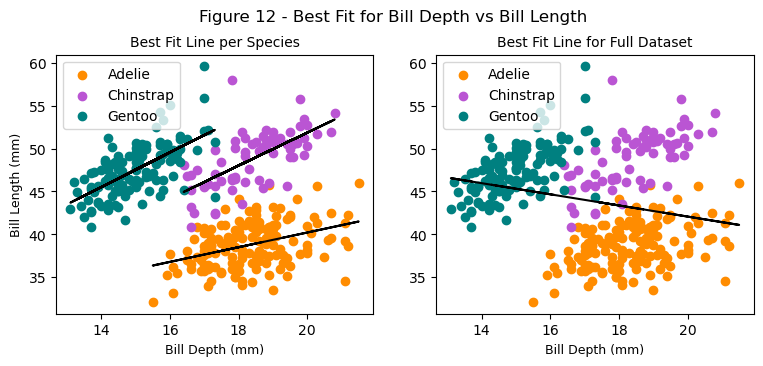

In [280]:
# Matplotlib and NumPy were used to create the side by side plots below, as Seaborn takes more control of the
# plot and can limit the amount of control that the user has as a result.

# Create the plot framework for the invididual scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3.5))

# Pull the required columns into numpy arrays
adelie_blen = adelie['bill_length_mm'].to_numpy()
adelie_bdep = adelie['bill_depth_mm'].to_numpy()
chinstrap_blen = chinstrap['bill_length_mm'].to_numpy()
chinstrap_bdep = chinstrap['bill_depth_mm'].to_numpy()
gentoo_blen = gentoo['bill_length_mm'].to_numpy()
gentoo_bdep = gentoo['bill_depth_mm'].to_numpy()

# Plot the bill depth vs length attribute for each species
axes[0].scatter(adelie_bdep, adelie_blen, label="Adelie", color='darkorange')
axes[0].scatter(chinstrap_bdep, chinstrap_blen, label="Chinstrap", color='mediumorchid')
axes[0].scatter(gentoo_bdep, gentoo_blen, label="Gentoo", color='teal')
axes[0].set_xlabel('Bill Depth (mm)', fontsize=9)
axes[0].set_ylabel('Bill Length (mm)', fontsize=9)
axes[0].set_title('Best Fit Line per Species', fontsize=10)
axes[0].legend()

# Handle NaN and plot best fit line for Adelie
idx1 = np.isfinite(adelie_bdep) & np.isfinite(adelie_blen)
m1, c1 = np.polyfit(adelie_bdep[idx1], adelie_blen[idx1], 1)
axes[0].plot(adelie_bdep, adelie_bdep*m1 + c1, 'k-')

# Handle NaN and plot best fit line for Chinstrap
idx2 = np.isfinite(chinstrap_bdep) & np.isfinite(chinstrap_blen)
m2, c2 = np.polyfit(chinstrap_bdep[idx2], chinstrap_blen[idx2], 1)
axes[0].plot(chinstrap_bdep, chinstrap_bdep*m2 + c2, 'k-')

# Handle NaN and plot best fit line for Gentoo
idx3 = np.isfinite(gentoo_bdep) & np.isfinite(gentoo_blen)
m3, c3 = np.polyfit(gentoo_bdep[idx3], gentoo_blen[idx3], 1)
axes[0].plot(gentoo_bdep, gentoo_bdep*m3 + c3, 'k-')

# Plot the bill depth vs length attribute for each species
axes[1].scatter(adelie_bdep, adelie_blen, label="Adelie", color='darkorange')
axes[1].scatter(chinstrap_bdep, chinstrap_blen, label="Chinstrap", color='mediumorchid')
axes[1].scatter(gentoo_bdep, gentoo_blen, label="Gentoo", color='teal')
axes[1].set_xlabel('Bill Depth (mm)', fontsize=9)
#axes[1].set_ylabel('Bill Length (mm)', fontsize=9)
axes[1].set_title('Best Fit Line for Full Dataset', fontsize=10)
axes[1].legend()

# Calculate the best fit coefficients for a first order polynomial (straight line) for the penguins dataset
penguins_blen = penguins['bill_length_mm'].to_numpy()
penguins_bdep = penguins['bill_depth_mm'].to_numpy()

# There are NaNs in the dataset - only pass the "good" points to polyfit - reference [c6] was useful
idx = np.isfinite(penguins_bdep) & np.isfinite(penguins_blen)
m, c = np.polyfit(penguins_bdep[idx], penguins_blen[idx], 1)

# Plot the best fit line, 'k-' instructs matplotlib to draw a line in black
axes[1].plot(penguins_bdep, penguins_bdep*m + c, 'k-')

# Add an overall title
fig.subplots_adjust(top = 0.85)
fig.suptitle("Figure 12 - Best Fit for Bill Depth vs Bill Length", fontsize=12)


As can be seen from the left hand plot above, the best fit lines for each species imply a positive correlation between bill_depth and bill_length, i.e. an increase in one is accompanied by an increase in the other. It should also be noted that this correlation is not very strong, particularly in the case of Adelie, where the points are quite spread out. Chinstrap and Gentoo look a little more linear. This agrees with the correlation values calculated earlier - Adelie is the lowest of the species at 0.39; Chinstrap and Gentoo are more correlated at 0.65 and 0.64 respectively.

| Species | Correlation |
|---------|-------------|
| Adelie | 0.39 |
| Chinstrap | 0.65 |
| Gentoo | 0.64 |
| Overall | -0.24 |

We can also see from the right hand plot that the best fit line for the penguins dataset overall implies a negative correlation between bill_depth and bill_length, i.e. an increase in one results in a decrease in the other. From the calculated correlation values, this was -0.24, which is weak. 

This example clearly demonstrates that it is not particularly meaningful to analyze the penguins dataset as a whole, and the data should instead be analyzed for each individual species. The Gentoo species on average has a 'longer, thinner' beak than the other 2 species, Adelie in particular, and as a consequence, this is skewing the correlation results.

#### Analysis - Flipper Length vs Body Mass
From the plots it can be seen that this is one pair of attributes for which the correlation is higher. We again plot them side by side for a closer look.

Text(0.5, 0.98, 'Figure 13 - Best Fit for Flipper Length vs Body Mass')

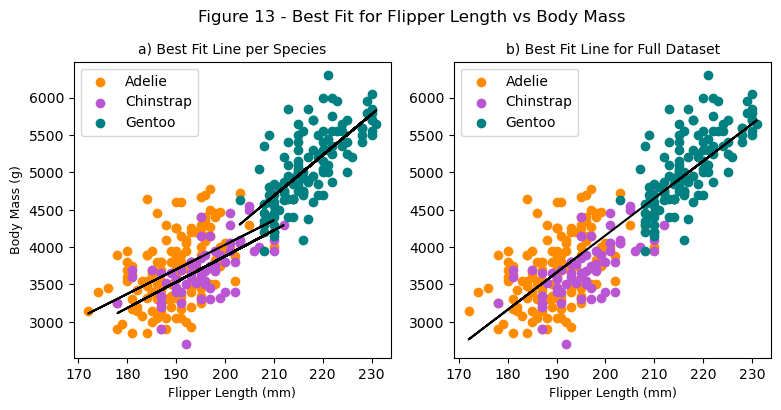

In [281]:
# Matplotlib and NumPy were used to create the side by side plots below, as Seaborn takes more control of the
# plot and can limit the amount of control that the user has as a result.

# Create the plot framework for the invididual scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

# Pull the required columns into numpy arrays
adelie_flen = adelie['flipper_length_mm'].to_numpy()
adelie_mass = adelie['body_mass_g'].to_numpy()
chinstrap_flen = chinstrap['flipper_length_mm'].to_numpy()
chinstrap_mass = chinstrap['body_mass_g'].to_numpy()
gentoo_flen = gentoo['flipper_length_mm'].to_numpy()
gentoo_mass = gentoo['body_mass_g'].to_numpy()

# Plot the bill depth vs length attribute for each species
axes[0].scatter(adelie_flen, adelie_mass, label="Adelie", color='darkorange')
axes[0].scatter(chinstrap_flen, chinstrap_mass, label="Chinstrap", color='mediumorchid')
axes[0].scatter(gentoo_flen, gentoo_mass, label="Gentoo", color='teal')
axes[0].set_xlabel('Flipper Length (mm)', fontsize=9)
axes[0].set_ylabel('Body Mass (g)', fontsize=9)
axes[0].set_title('a) Best Fit Line per Species', fontsize=10)
axes[0].legend()

# Handle NaN and plot best fit line for Adelie
idx1 = np.isfinite(adelie_flen) & np.isfinite(adelie_mass)
m1, c1 = np.polyfit(adelie_flen[idx1], adelie_mass[idx1], 1)
axes[0].plot(adelie_flen, adelie_flen*m1 + c1, 'k-')

# Handle NaN and plot best fit line for Chinstrap
idx2 = np.isfinite(chinstrap_flen) & np.isfinite(chinstrap_mass)
m2, c2 = np.polyfit(chinstrap_flen[idx2], chinstrap_mass[idx2], 1)
axes[0].plot(chinstrap_flen, chinstrap_flen*m2 + c2, 'k-')

# Handle NaN and plot best fit line for Gentoo
idx3 = np.isfinite(gentoo_flen) & np.isfinite(gentoo_mass)
m3, c3 = np.polyfit(gentoo_flen[idx3], gentoo_mass[idx3], 1)
axes[0].plot(gentoo_flen, gentoo_flen*m3 + c3, 'k-')

# Plot the bill depth vs length attribute for each species
axes[1].scatter(adelie_flen, adelie_mass, label="Adelie", color='darkorange')
axes[1].scatter(chinstrap_flen, chinstrap_mass, label="Chinstrap", color='mediumorchid')
axes[1].scatter(gentoo_flen, gentoo_mass, label="Gentoo", color='teal')
axes[1].set_xlabel('Flipper Length (mm)', fontsize=9)
#axes[1].set_ylabel('Body Mass (g)', fontsize=9)
axes[1].set_title('b) Best Fit Line for Full Dataset', fontsize=10)
axes[1].legend()

# Calculate the best fit coefficients for a first order polynomial (straight line) for the penguins dataset
penguins_flen = penguins['flipper_length_mm'].to_numpy()
penguins_mass = penguins['body_mass_g'].to_numpy()

# There are NaNs in the dataset - only pass the "good" points to polyfit - reference [c6] was useful
idx = np.isfinite(penguins_flen) & np.isfinite(penguins_mass)
m, c = np.polyfit(penguins_flen[idx], penguins_mass[idx], 1)

# Plot the best fit line, 'k-' instructs matplotlib to draw a line in black
axes[1].plot(penguins_flen, penguins_flen*m + c, 'k-')

# Add an overall title
fig.subplots_adjust(top = 0.85)
fig.suptitle("Figure 13 - Best Fit for Flipper Length vs Body Mass", fontsize=12)


As can be seen from the left hand plot above, the best fit lines for each species again imply a positive correlation between flipper length and body mass, i.e. an increase in one is accompanied by an increase in the other. It should also be noted that this correlation is not very strong in all cases, particularly in the case of Adelie where the points are quite spread out. Gentoo look more linear, and Chinstrap looks to be in between. This again agrees with the correlation values calculated earlier - Adelie is the lowest of the species at 0.47; Gentoo is the highest at 0.70.

| Species | Correlation |
|---------|-------------|
| Adelie | 0.47 |
| Chinstrap | 0.64 |
| Gentoo | 0.70 |
| Overall | 0.87 |

However, in ths case, the correlation for the overall dataset at 0.87 is **higher** than for any of the individual species. From an inspection of the plot, this appears to be because the Gentoo samples are actually grouped linearly further out along a first-order first fit line from the Adelie and Chinstrap samples - resulting in an optimization of the least squares calculation across a larger dataset as compared to the individual species.
Even though the correlation is higher for the penguins dataset overall, I would argue that it's an artefact and the correlation at an individual species level is more meaningful.

### Influence of Penguins' Sex on the Measured Attributes  
The *palmerpenguins dataset* is distributed across male and female penguins for each species, and we did not separate the sexes out when analyzing the species.  
The following plots show the pairwise attribute scatterplots for each species.

Text(0.5, 0.98, 'Figure 14 - Scatterplots of Adelie Attribute Pairs, Colour Coded by Sex')

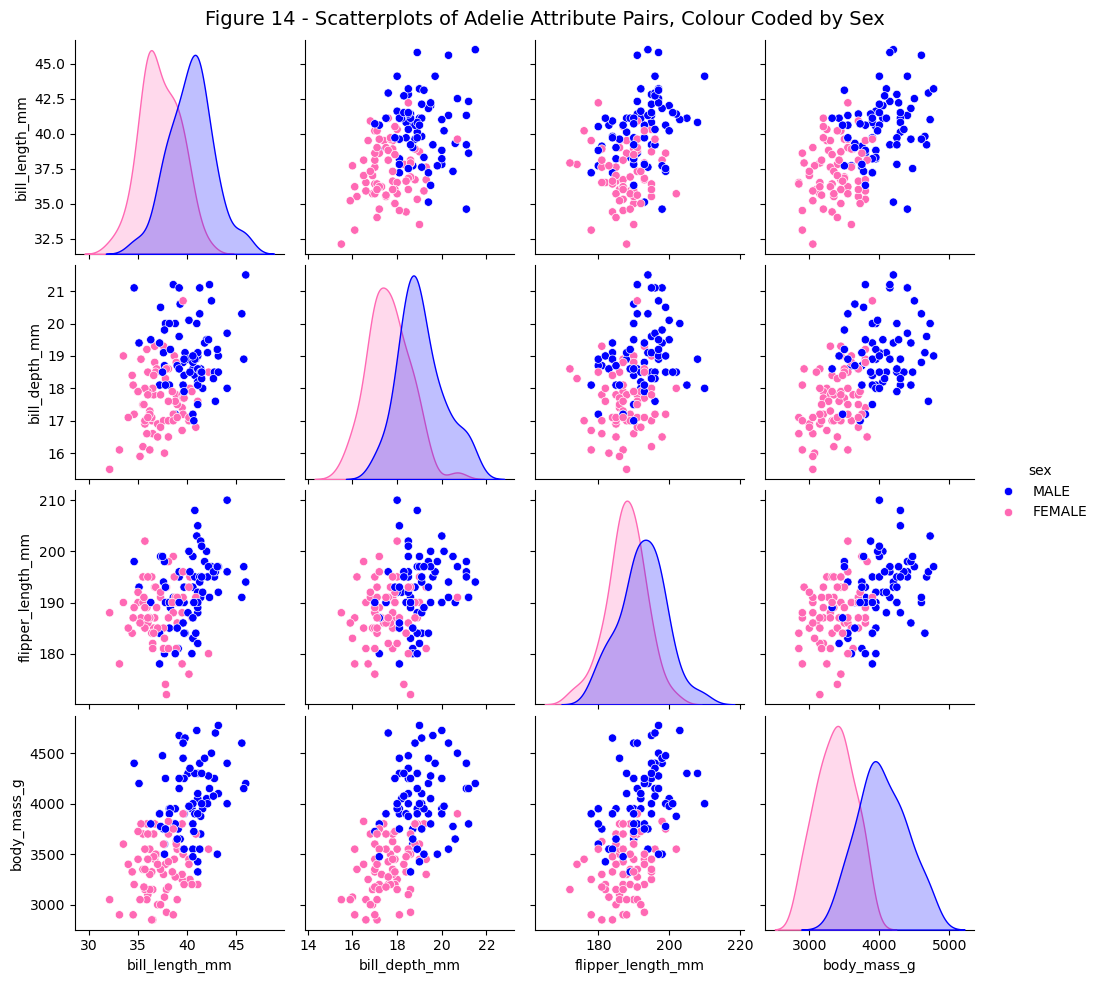

In [282]:
ax1=sns.pairplot(adelie,hue="sex", palette=['blue','hotpink'],corner=False)
ax1.figure.subplots_adjust(top = 0.95)
ax1.figure.suptitle("Figure 14 - Scatterplots of Adelie Attribute Pairs, Colour Coded by Sex", fontsize=14)

Text(0.5, 0.98, 'Figure 15 - Scatterplots of Chinstrap Attribute Pairs, Colour Coded by Sex')

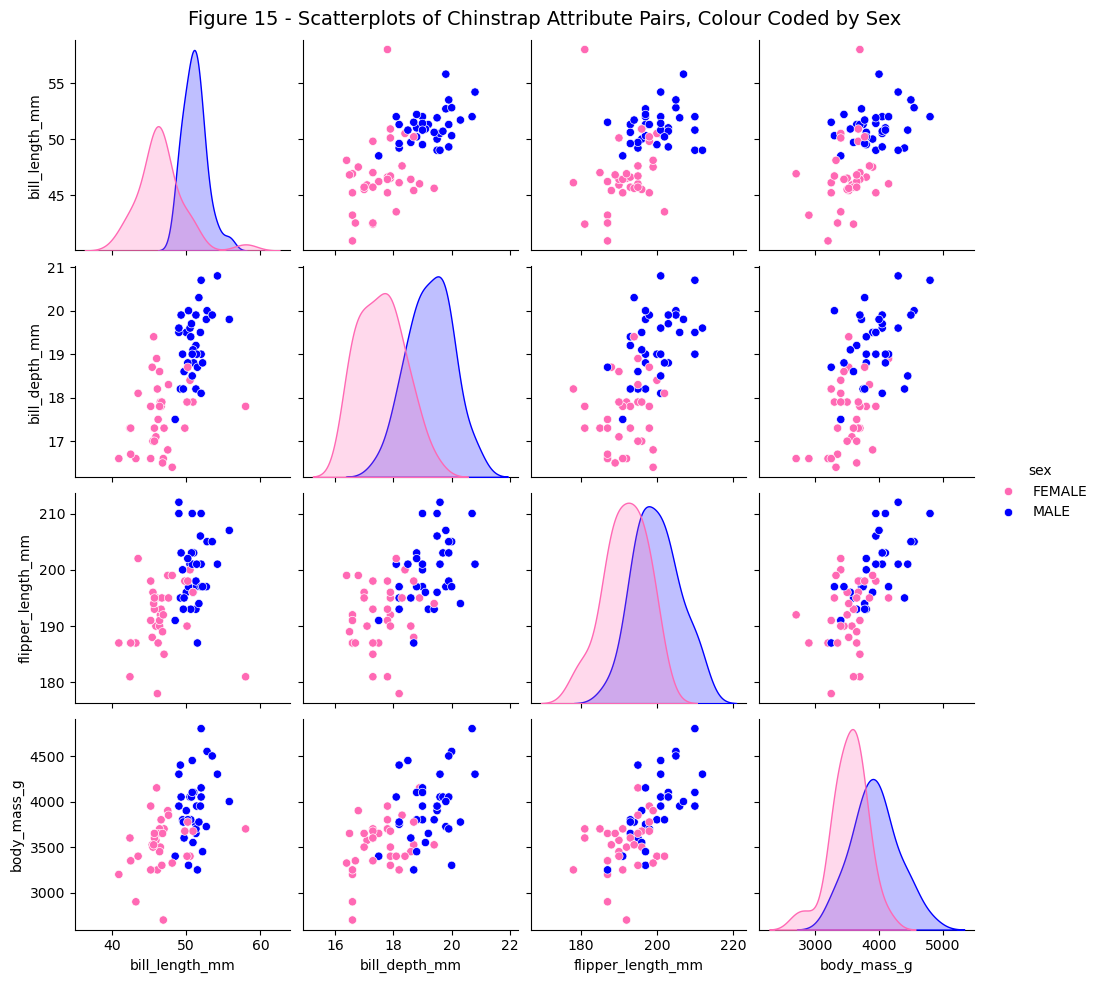

In [283]:
ax2=sns.pairplot(chinstrap,hue="sex", palette=['hotpink','blue'], corner=False)
ax2.figure.subplots_adjust(top = 0.95)
ax2.figure.suptitle("Figure 15 - Scatterplots of Chinstrap Attribute Pairs, Colour Coded by Sex", fontsize=14)

Text(0.5, 0.98, 'Figure 16 - Scatterplots of Gentoo Attribute Pairs, Colour Coded by Sex')

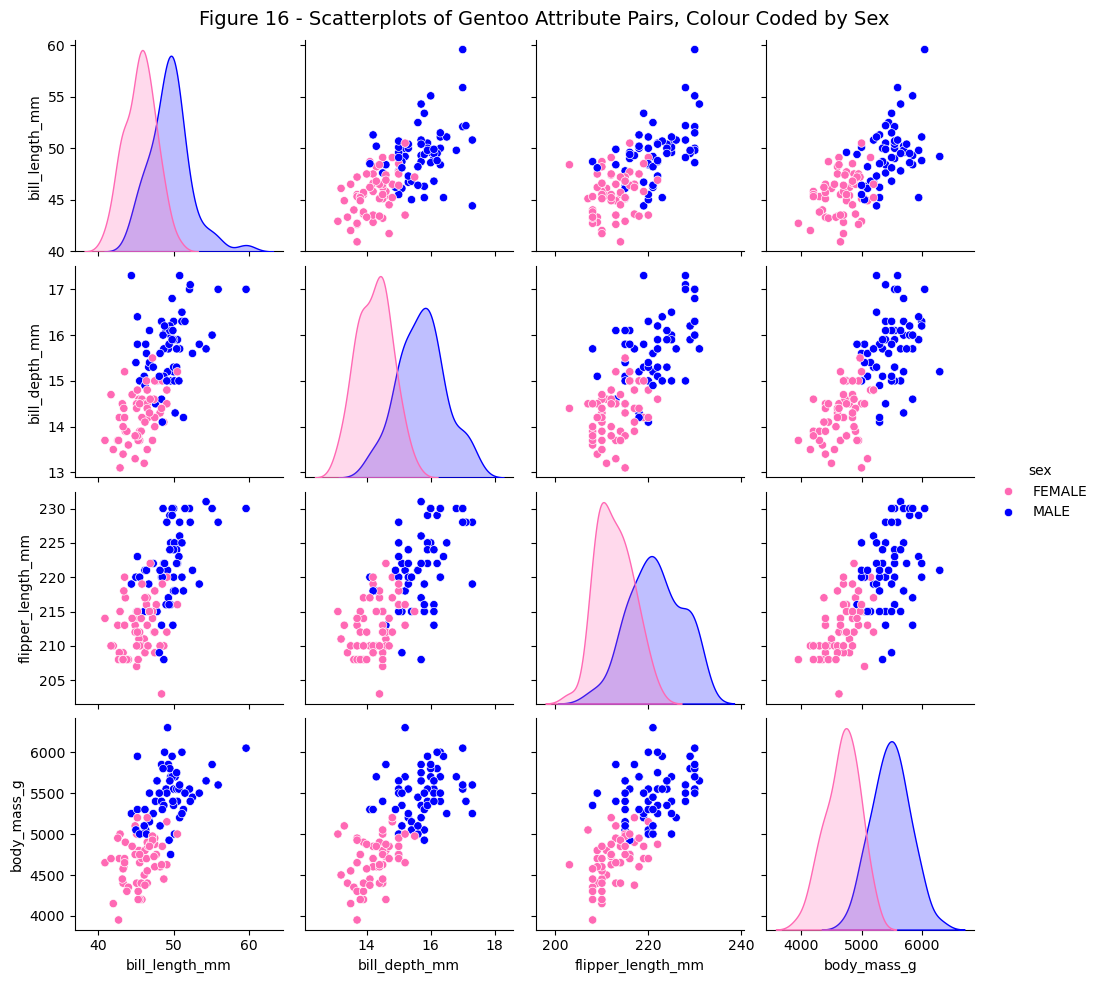

In [284]:
ax3=sns.pairplot(gentoo,hue="sex", palette=['hotpink','blue'], corner=False)
ax3.figure.subplots_adjust(top = 0.95)
ax3.figure.suptitle("Figure 16 - Scatterplots of Gentoo Attribute Pairs, Colour Coded by Sex", fontsize=14)

The picture is much less clear across the full *palmerpenguins* dataset, as can be seen in Figure 17 below.  
This should not necessarily be surprising as we know already that the attributes differ by species, therefore we would expect the data for the males of the smaller species to overlap with the data for the females of the larger species.

Text(0.5, 0.98, 'Figure 17 - Scatterplots of All Penguin Attribute Pairs, Colour Coded by Sex')

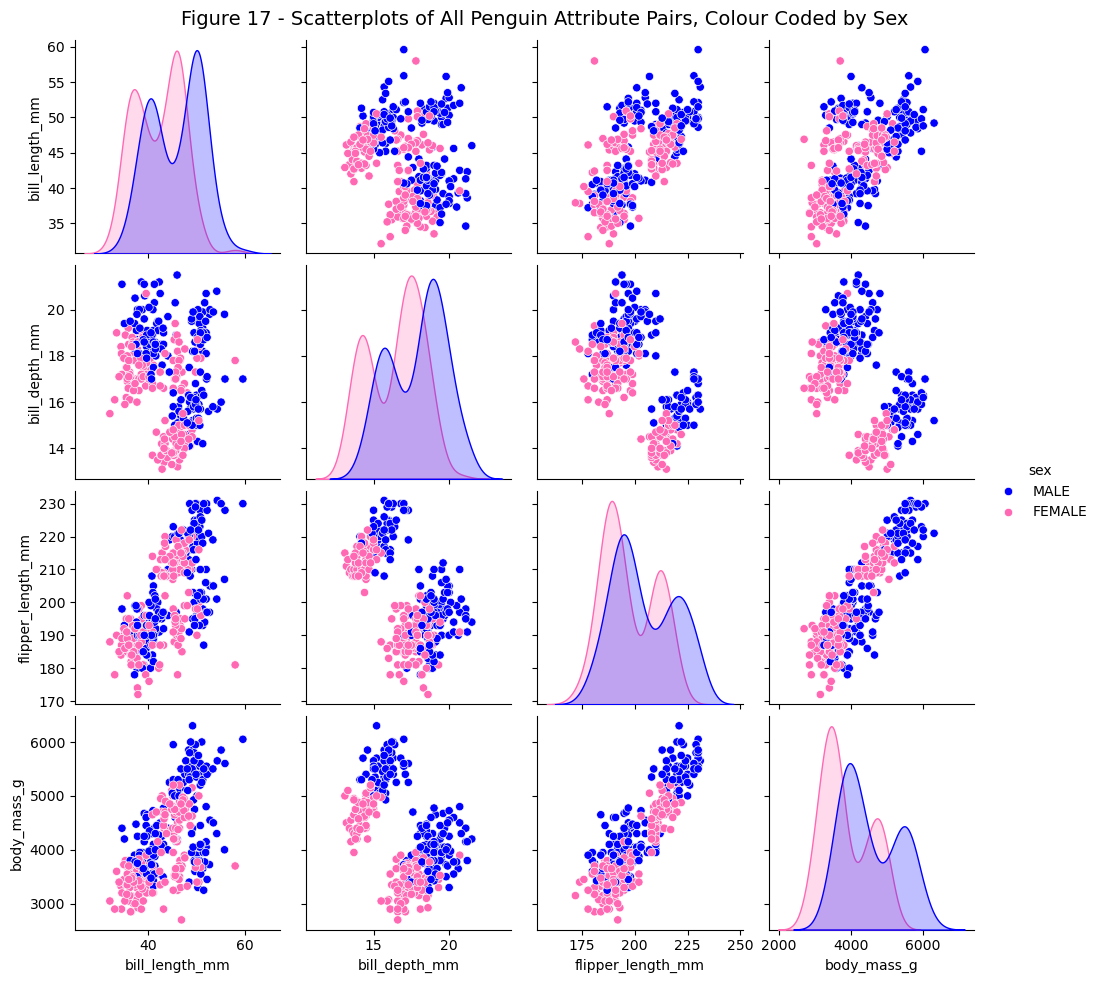

In [285]:
ax4=sns.pairplot(penguins,hue="sex", palette=['blue','hotpink'],corner=False)
ax4.figure.subplots_adjust(top = 0.95)
ax4.figure.suptitle("Figure 17 - Scatterplots of All Penguin Attribute Pairs, Colour Coded by Sex", fontsize=14)

The kernel density plots along the diagonals plot the distribution for each single attribute, and the results are consistent across attributes and species.  

While for each attribute across every individual species there is a clear overlap between male and female populations, the male values are on average higher in every case. This implies that for any in-depth analysis of these attributes, the male and female populations should be considered separately.  
  
Furthermore, meaningful detail is again lost when we look at the dataset as a whole as opposed to by species.

## Summary and Conclusions
<a name="Summary-and-Conclusions"></a>
We started by loading the *palmerpenguins* dataset into a Pandas DataFrame and inspecting the rows, columns and data types it contained; we checked for missing values and plotted some sample attributes. We also looked at the number of species that were sampled, and the locations where the samples were taken.  
  
We then took the analysis a step further, starting with the summary statistics for the penguins dataset as a whole and by species; we looked at the density plots for the numeric attributes, to get a view of how the data for the species overlapped. We then looked at the correlation between pairs of attributes per species and across the full dataset. From this, we concluded that:  
- None of the species stood out on all measured attributes; where Gentoo stood out on some, it overlapped with at least one other species on others.
- Gentoo appears to be linearly separable on many of the attribute-pair plots, with greater overlap between Adelie and Chinstrap.
- There does not appear to be any significant correlation (>0.8) across the attribute pairs on a per-species basis. One pair (bill depth vs bill length) had a correlation of 0.87 across the dataset as a whole, but the correlation was lower for each of the 3 species which is a more meaningful way to look at the data.  
  
Best fit lines were plotted and some anomalies were apparent. All best fit lines for the species had a positive slope, meaning that as one attribute increased, the other would also be expected to increase. However the best fit lines for half of the pairwise plots in the full *penguins* dataset had a negative slope, implying that as one of the pair increase, the other **decreased**. This is an artefact of jumping from species to species within the plot - literally comparing apples to oranges could well give you the same result.

We finally looked at the density and scatter plots for male vs female penguins of each species and across the full dataset, and concluded that the differences were significant enough for each species to merit splitting the data for the sexes out when carrying out any further analysis of the dataset.  
  
The sample locations were another variable we could have inspected in more detail, but since only one species was sampled in more than one location I did not think that this was worth prioritizing.

In conclusion, it's an interesting dataset with more degrees of freedom than we explored in this exercise. The correlation numbers per species were a mixed bag, higher for Gentoo than Adelie or Chinstrap and in general indicating a looser relationship between the attributes than might have been expected. It would also be beneficial to have samples from multiple locations for each species, and the sexes also need to be taken into account when analyzing the dataset. 

## References
<a id="References"></a>

### General References
These are referred to as [g1], [g2], etc throughout the notebook.
1. [GitHub repository for palmerpenguins](https://allisonhorst.github.io/palmerpenguins/)
2. [palmerpenguins citation](https://allisonhorst.github.io/palmerpenguins/) - Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: PalmerArchipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi:10.5281/zenodo.3960218.
3. [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) - reference used to gain a better understanding of correlation.  
4. [Covariance](https://en.wikipedia.org/wiki/Covariance) - used for an overview of covariance, as it is closely related to correlation.  
5. [Iris Analysis - Programming and Scripting project](https://github.com/dvdgeroconnell/pands-project.git) - I used some background from here as I had already done some background investigation on correlation and best fit.

### Code References
These are referred to as [c1], [c2], etc throughout the notebook.
1. [Pandas correlation](https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/)
2. [Colour maps, colour bars](https://stackoverflow.com/questions/13784201/how-to-have-one-colorbar-for-all-subplots?noredirect=1&lq=1)
3. [Penguins plots](https://towardsdatascience.com/plotly-pandas-for-the-palmer-penguins-f5cdab3c16c8) - used to figure out how to tabulate the penguin species by island.
4. [Plotting bar and pie charts](https://www.w3schools.com/python/matplotlib_bars.asp) - useful tutorials on W3Schools, used this site to help with bar and pie charts.
5. [Replacing NaN with another value](https://datascience.stackexchange.com/questions/97087/plot-nans-as-a-category-seaborn-countplot) - this helped with creating a plot of the counts of the sex of the penguins, including a separate bar for the missing values.
6. [Handling NaN with polyfit](https://stackoverflow.com/questions/28647172/numpy-polyfit-doesnt-handle-nan-values) - this was useful in figuring out how to get polyfit() to work with datasets that contain NaN.
7. [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html) - the definitive resource for understanding and using Pandas features and capabilities.

***
### End